In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
from matplotlib import style

In [3]:
data=pd.read_csv("student-mat.csv",sep=";")

In [4]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [36]:
data=data[["G1","G2","G3","studytime","failures","absences"]]

In [37]:
data.head()

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4


In [7]:
predict="G3"
x=np.array(data.drop([predict],1))
y=np.array(data[predict])

In [8]:
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y,test_size=0.1)

In [9]:
linear=linear_model.LinearRegression()

In [10]:
linear.fit(x_train,y_train)
acc=linear.score(x_test,y_test)

In [11]:
acc

0.8098175835402982

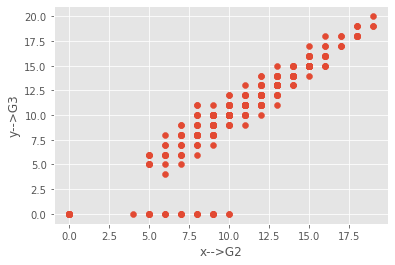

In [12]:
style.use("ggplot")
plt.scatter(data['G2'],data['G3'])
plt.xlabel("x-->G2")
plt.ylabel("y-->G3")
plt.show()

In [14]:
linear.coef_     #line in five dimensional space(5 m)

array([ 0.13402393,  0.98657987, -0.18254252, -0.30186742,  0.03296016])

In [15]:
with open ("studentmodel.pickle","wb") as f:
    pickle.dump(linear,f)
pickle_in=open("studentmodel.pickle","rb")
linear=pickle.load(pickle_in)

In [16]:
linear.intercept_

-1.313819583346321

In [17]:
predictions=linear.predict(x_test)

In [21]:
print("predicted\t\tActual")
for x in range (len(predictions)):
    print(predictions[x],"    ",y_test[x])

predicted		Actual
9.647198055996432      11
10.263067078941205      11
10.959936979705736      10
10.245665353259124      11
12.196822971484286      13
18.69190794889738      18
-0.3386653348471811      0
9.210566897687006      0
12.888944728776485      12
11.81685952099927      10
14.009548524472155      14
15.61151954817163      16
15.062048705726356      15
13.088888970419026      13
8.016973483455612      8
4.255899232054723      6
16.000109985461563      18
10.726173172573507      10
19.990687658871636      19
9.841516484851      10
11.963918573041479      13
18.540482295173298      18
15.626737973012775      15
14.947609804207366      15
12.820841114335012      13
7.6454447655707085      7
9.843699785691939      10
12.016803762641809      14
8.538370173194869      10
15.129812313890783      17
19.85884703167057      19
19.379323098230657      20
11.882779834599804      11
9.775596171250466      10
9.44162800156592      11
11.144322790230087      11
10.781761065427148      12
10.7